# PyTorch MNIST

In [38]:
# Import PyTorch
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split, TensorDataset

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Import numpy
import pandas as pd

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.4.1+cpu
torchvision version: 0.19.1+cpu


In [40]:
"""
Perform data preprocessing by modifying the Dataloader to  read from the csv file.
"""
data = pd.read_csv("MNIST_dataset.csv")

train_tensor = torch.tensor(data.to_numpy())
print(train_tensor.shape)

images = train_tensor[:, :-1]
labels = train_tensor[:, -1]

# Reshape the images to 28x28
images = images.view(-1, 28, 28)

print(images.shape)
print(labels.shape)

train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
print(train_data.data.shape)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)
print(test_data.data.shape)

torch.Size([200, 785])
torch.Size([200, 28, 28])
torch.Size([200])
torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [46]:
"""
Split the dataset into Train, Validation and Test sets. Create their corresponding Dataloaders.
"""
dataset = TensorDataset(images, labels)
train_size = int(0.8 * len(dataset)) #train size 80%
val_size = int(0.10 * len(dataset)) # Validation size 10%
test_size = len(dataset) - train_size - val_size # test size 10 %

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [47]:
# Function to test and print data from a DataLoader
def test_dataloader(dataloader, dataloader_name):
    print(f"\nTesting {dataloader_name}:")
    # Get one batch of data
    for images, labels in dataloader:
        print(f"Images batch shape: {images.shape}")  # Should be [batch_size, 28, 28]
        print(f"Labels batch shape: {labels.shape}")  # Should be [batch_size]
        print(f"First label in batch: {labels[0]}")   # Print the first label
        print(f"First image in batch: {images[0]}")   # Print the first image tensor (you can visualize it with matplotlib)
        break  # Only test with one batch

# Test Train DataLoader
test_dataloader(train_loader, "Train DataLoader")

# Test Validation DataLoader
test_dataloader(val_loader, "Validation DataLoader")

# Test Test DataLoader
test_dataloader(test_loader, "Test DataLoader")



Testing Train DataLoader:
Images batch shape: torch.Size([32, 28, 28])
Labels batch shape: torch.Size([32])
First label in batch: 2
First image in batch: tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 207, 253,
         255, 206,  88,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  

In [3]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [4]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

In [5]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
# See classes
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
print(f"train_data: {train_data},\n test_data: {test_data}")

train_data: Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor(),
 test_data: Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


## Visualize the data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '5')

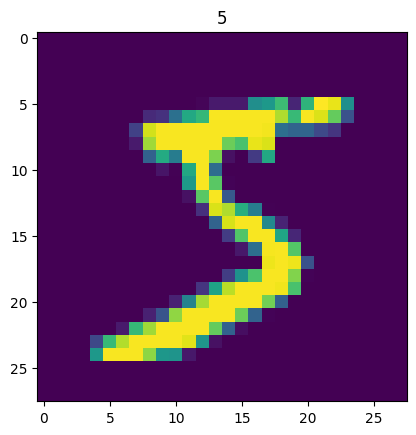

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label)

Text(0.5, 1.0, '5 - five')

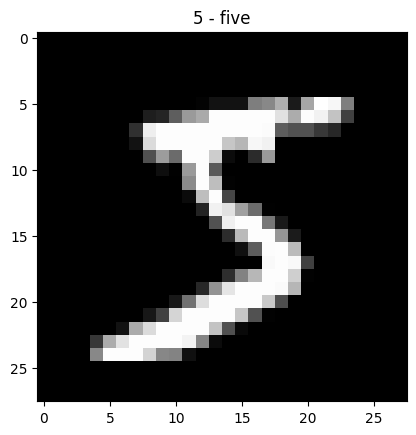

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

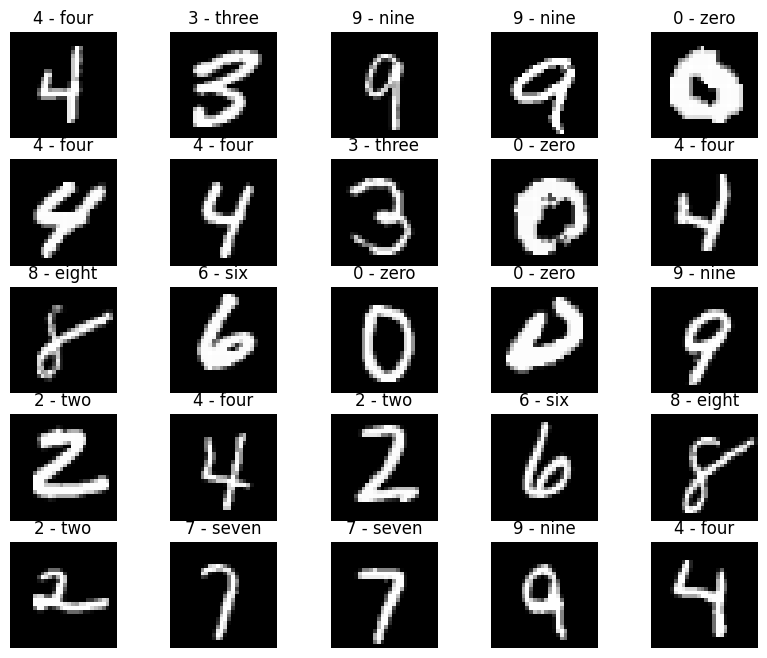

In [10]:
#torch.manual_seed(42)
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
plt.show()

## Building `DataLoaders` classes to load data

In [11]:
from torch.utils.data import DataLoader

train_loader = torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1)
test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1)
loaders = {
    'train' : train_loader,
    'test': test_loader,
}

In [12]:
print(loaders)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x000002146E625940>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x000002146E376090>}


## Using the `dataloader`

torch.Size([100, 1, 28, 28])


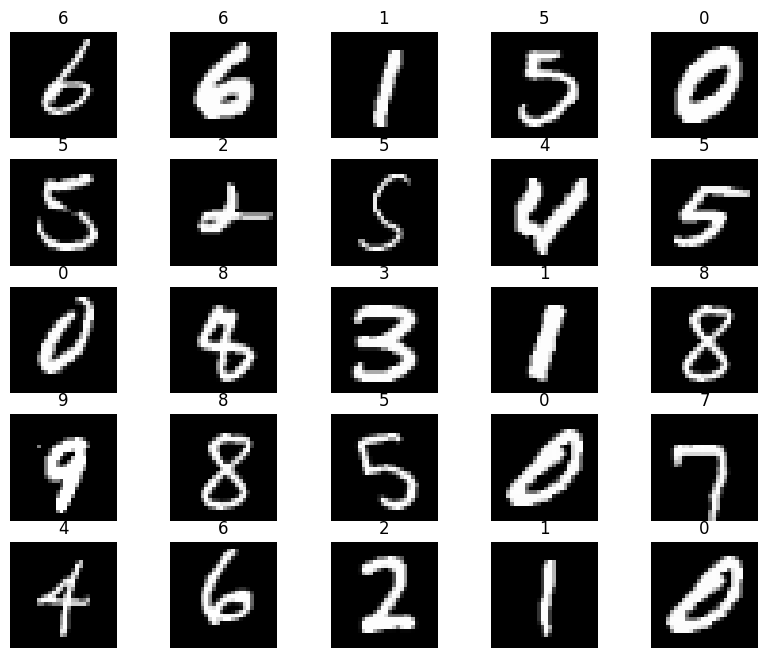

In [13]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5

imgs, labels = next(iter(loaders['train']))
print(imgs.shape)
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(imgs.shape[0], size=(1,)).item()
    img, label = imgs[sample_idx,:,:,:], labels[sample_idx].item()
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Model

In [14]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output

In [15]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


## Loss function

In [16]:
loss_func = nn.CrossEntropyLoss()
print(loss_func)

CrossEntropyLoss()


## Optimizer

In [17]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

## Train the model

In [18]:
num_epochs = 10

def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            output = cnn(images)
            loss = loss_func(output, labels)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward() # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            

In [19]:
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.1933
Epoch [1/10], Step [200/600], Loss: 0.0396
Epoch [1/10], Step [300/600], Loss: 0.0727
Epoch [1/10], Step [400/600], Loss: 0.0120
Epoch [1/10], Step [500/600], Loss: 0.0266
Epoch [1/10], Step [600/600], Loss: 0.0098
Epoch [2/10], Step [100/600], Loss: 0.0480
Epoch [2/10], Step [200/600], Loss: 0.0257
Epoch [2/10], Step [300/600], Loss: 0.0743
Epoch [2/10], Step [400/600], Loss: 0.0436
Epoch [2/10], Step [500/600], Loss: 0.0334
Epoch [2/10], Step [600/600], Loss: 0.0547
Epoch [3/10], Step [100/600], Loss: 0.0645
Epoch [3/10], Step [200/600], Loss: 0.0426
Epoch [3/10], Step [300/600], Loss: 0.0674
Epoch [3/10], Step [400/600], Loss: 0.0337
Epoch [3/10], Step [500/600], Loss: 0.0224
Epoch [3/10], Step [600/600], Loss: 0.0144
Epoch [4/10], Step [100/600], Loss: 0.0678
Epoch [4/10], Step [200/600], Loss: 0.0039
Epoch [4/10], Step [300/600], Loss: 0.0339
Epoch [4/10], Step [400/600], Loss: 0.1988
Epoch [4/10], Step [500/600], Loss: 0.0132
Epoch [4/10

## Test the model on test dataset

In [20]:
def test():
    # Test the model
    cnn.eval()    
    with torch.no_grad():
        for images, labels in loaders['test']:
            test_output = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

In [21]:
test()

Test Accuracy of the model on the 10000 test images: 0.98


## Print predictions

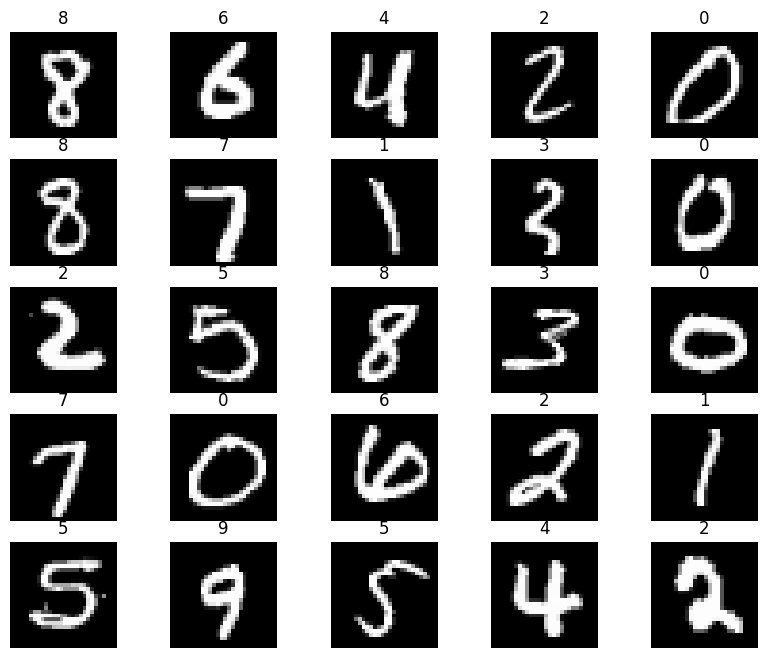

Prediction number: 	 [8 6 4 2 0 8 7 1 3 0 2 5 8 3 0 7 0 6 2 1 5 9 5 4 2]
Actual number: 	 	 [8 6 4 2 0 8 7 1 3 0 2 5 8 3 0 7 0 6 2 1 5 9 5 4 2]


In [22]:
imgs, lbls  = next(iter(loaders['test']))
true_labels = lbls[:25].numpy()

test_output = cnn(imgs[:25])
pred_labels = torch.max(test_output, 1)[1].data.numpy().squeeze()

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    img, pred_label = imgs[i-1,:,:,:], pred_labels[i-1].item()
    figure.add_subplot(rows, cols, i)
    plt.title(pred_label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

print(f'Prediction number: \t {pred_labels}')
print(f'Actual number: \t \t {true_labels}')